In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

%matplotlib inline 
sns.set_style("white")

In [92]:
## select the dataset
#df=pd.read_csv('../Final/Berlin/merge_data_files/Entire_home_apt.csv' ,low_memory=False,index_col=0) 
df=pd.read_csv('../Final/Berlin/2020-06-13_listings.csv',low_memory=False)

In [93]:
# Listings segmentation using K-Means Clustering

In [94]:
pd.set_option("display.max_columns", 106) 
df.head()

id                        listing_url       scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  20200613063607   2020-06-15   
1  3176  https://www.airbnb.com/rooms/3176  20200613063607   2020-06-15   
2  3309  https://www.airbnb.com/rooms/3309  20200613063607   2020-06-15   
3  7071  https://www.airbnb.com/rooms/7071  20200613063607   2020-06-15   
4  9991  https://www.airbnb.com/rooms/9991  20200613063607   2020-06-15   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                   Fabulous Flat in great Location   
2                 BerlinSpot Schöneberg near KaDeWe   
3                  BrightRoom with sunny greenview!   
4               Geourgeous flat - outstanding views   

                                             summary  \
0  Great location!  30 of 75 sq meters. This wood...   
1  This beautiful first floor apartment  is situa...   
2  First of all: I prefer short-notice bookings. ...   
3  Cozy and large room in the beautiful district ...   
4  4 bedroom with very large windows and outstand...   

                                               space  \
0  A+++ location! This „Einliegerwohnung“ is an e...   
1  1st floor (68m2) apartment on Kollwitzplatz/ P...   
2  Your room is really big and has 26 sqm, is ver...   
3  The BrightRoom is an approx. 20 sqm (215ft²), ...   
4  THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...   

                                         description experiences_offered  \
0  Great location!  30 of 75 sq meters. This wood...                none   
1  This beautiful first floor apartment  is situa...                none   
2  First of all: I prefer short-notice bookings. ...                none   
3  Cozy and large room in the beautiful district ...                none   
4  4 bedroom with very large windows and outstand...                none   

                               neighborhood_overview  \
0  It is located in the former East Berlin area o...   
1  The neighbourhood is famous for its variety of...   
2  My flat is in the middle of West-Berlin, direc...   
3  Great neighborhood with plenty of Cafés, Baker...   
4  Prenzlauer Berg is an amazing neighbourhood wh...   

                                               notes  \
0  This is my home, not a hotel. I rent out occas...   
1  We welcome FAMILIES and cater especially for y...   
2  The flat is a strictly non-smoking facility! A...   
3  I hope you enjoy your stay to the fullest! Ple...   
4                                                NaN   

                                             transit  \
0  Close to U-Bahn U8 and U2 (metro), Trams M12, ...   
1  We are 5 min walk  away from the tram M2, whic...   
2  The public transportation is excellent: Severa...   
3  Best access to other parts of the city via pub...   
4  Excellent location regarding public transport ...   

                                              access  \
0  Simple kitchen/cooking, refrigerator, microwav...   
1  The apartment will be entirely yours. We are c...   
2  I do have a strictly non-smoker-flat.  Keep th...   
3  The guests have access to the bathroom, a smal...   
4          All amenities shared - nothing off limits   

                                         interaction  \
0                                   Always available   
1  Feel free to ask any questions prior to bookin...   
2  I'm working as a freelancing photographer. My ...   
3  I am glad if I can give you advice or help as ...   
4  Guests will have the whole apartment to themse...   

                                         house_rules  thumbnail_url  \
0  No parties No events No pets No smoking, not e...            NaN   
1  It’s a non smoking flat, which likes to be tre...            NaN   
2  House-Rules and Information ..............(deu...            NaN   
3  Please take good care of everything during you...            NaN   
4                                                NaN

In [95]:
pd.get_option("display.max_rows")
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              50
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4670
Length: 106, dtype: int64

In [96]:
pd.set_option("display.max_rows", 80) 
df.nunique()

id                                              24813
listing_url                                     24813
scrape_id                                           1
last_scraped                                        4
name                                            24044
                                                ...  
calculated_host_listings_count                     33
calculated_host_listings_count_entire_homes        30
calculated_host_listings_count_private_rooms       13
calculated_host_listings_count_shared_rooms        10
reviews_per_month                                 690
Length: 106, dtype: int64

In [97]:
df.price

0         $60.00
1         $90.00
2         $28.00
3         $33.00
4        $180.00
          ...   
24808    $249.00
24809     $89.00
24810     $15.00
24811     $30.00
24812     $50.00
Name: price, Length: 24813, dtype: object

In [98]:
df.price=pd.to_numeric(df.price.str.replace('$','').str.replace(',',''))

df=df.loc[df.price<1000]

In [99]:
df

id                            listing_url       scrape_id  \
0          2015      https://www.airbnb.com/rooms/2015  20200613063607   
1          3176      https://www.airbnb.com/rooms/3176  20200613063607   
2          3309      https://www.airbnb.com/rooms/3309  20200613063607   
3          7071      https://www.airbnb.com/rooms/7071  20200613063607   
4          9991      https://www.airbnb.com/rooms/9991  20200613063607   
...         ...                                    ...             ...   
24808  43760501  https://www.airbnb.com/rooms/43760501  20200613063607   
24809  43762138  https://www.airbnb.com/rooms/43762138  20200613063607   
24810  43762682  https://www.airbnb.com/rooms/43762682  20200613063607   
24811  43763239  https://www.airbnb.com/rooms/43763239  20200613063607   
24812  43764870  https://www.airbnb.com/rooms/43764870  20200613063607   

      last_scraped                                               name  \
0       2020-06-15   Berlin-Mitte Value! Quiet courtyard/very central   
1       2020-06-15                    Fabulous Flat in great Location   
2       2020-06-15                  BerlinSpot Schöneberg near KaDeWe   
3       2020-06-15                   BrightRoom with sunny greenview!   
4       2020-06-15                Geourgeous flat - outstanding views   
...            ...                                                ...   
24808   2020-06-14  Big Stylish Design Apartment  near Kurfürstendamm   
24809   2020-06-15   Near HTW Schönefeld Airport Apartment with 4K TV   
24810   2020-06-14                                 free room Neukölln   
24811   2020-06-14     Frisch renoviertes ruhiges Zimmer an der Spree   
24812   2020-06-15                            Practical & Cozy Studio   

                                                 summary  \
0      Great location!  30 of 75 sq meters. This wood...   
1      This beautiful first floor apartment  is situa...   
2      First of all: I prefer short-notice bookings. ...   
3      Cozy and large room in the beautiful district ...   
4      4 bedroom with very large windows and outstand...   
...                                                  ...   
24808  The Place to be! Sauberkeit hatte für uns scho...   
24809                                                NaN   
24810  cute room in shared flat.  heart of Neukölln i...   
24811  Die gemütliche Wohnung wurde vor paar Monaten ...   
24812  Very cozy and practical Studio Flat in Berlin-...   

                                                   space  \
0      A+++ location! This „Einliegerwohnung“ is an e...   
1      1st floor (68m2) apartment on Kollwitzplatz/ P...   
2      Your room is really big and has 26 sqm, is ver...   
3      The BrightRoom is an approx. 20 sqm (215ft²), ...   
4      THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...   
...                                                  ...   
24808  5 Zimmer-Wohnung 120 qm im 1. Stock. Im verkeh...   
24809                                                NaN   
24810                                                NaN   
24811  In der WG wohnen drei weitere internationale S...   
24812  This is our home and we want it to be respecte...   

                                             description experiences_offered  \
0      Great location!  30 of 75 sq meters. This wood...                none   
1      This beautiful first floor apartment  is situa...                none   
2      First of all: I prefer short-notice bookings. ...                none   
3      Cozy and large room in the beautiful district ...                none   
4      4 bedroom with very large windows and outstand...                none   
...                                                  ...                 ...   
24808  The Place to be! Sauberkeit hatte für uns scho...                none   
24809                                                NaN                none   
24810  cute room in shared flat.  heart of Neukölln i...                none   
24811

In [100]:
#function for locking a dataset 
# column its a string
#argument is a list 


def lock_data(column, argument):
    d=pd.concat([df.loc[df[column]==i] for i in argument])
    return d

In [101]:
df=lock_data('room_type', ['Entire home/apt'])

In [102]:
df

id                            listing_url       scrape_id  \
0          2015      https://www.airbnb.com/rooms/2015  20200613063607   
1          3176      https://www.airbnb.com/rooms/3176  20200613063607   
4          9991      https://www.airbnb.com/rooms/9991  20200613063607   
5         14325     https://www.airbnb.com/rooms/14325  20200613063607   
6         16644     https://www.airbnb.com/rooms/16644  20200613063607   
...         ...                                    ...             ...   
24806  43754331  https://www.airbnb.com/rooms/43754331  20200613063607   
24807  43755105  https://www.airbnb.com/rooms/43755105  20200613063607   
24808  43760501  https://www.airbnb.com/rooms/43760501  20200613063607   
24809  43762138  https://www.airbnb.com/rooms/43762138  20200613063607   
24812  43764870  https://www.airbnb.com/rooms/43764870  20200613063607   

      last_scraped                                               name  \
0       2020-06-15   Berlin-Mitte Value! Quiet courtyard/very central   
1       2020-06-15                    Fabulous Flat in great Location   
4       2020-06-15                Geourgeous flat - outstanding views   
5       2020-06-15                       Apartment in Prenzlauer Berg   
6       2020-06-14                 In the Heart of Berlin - Kreuzberg   
...            ...                                                ...   
24806   2020-06-15     sea-apartement outskirts Berlin with boathouse   
24807   2020-06-14                     Cosy Sunny in Hackescher Markt   
24808   2020-06-14  Big Stylish Design Apartment  near Kurfürstendamm   
24809   2020-06-15   Near HTW Schönefeld Airport Apartment with 4K TV   
24812   2020-06-15                            Practical & Cozy Studio   

                                                 summary  \
0      Great location!  30 of 75 sq meters. This wood...   
1      This beautiful first floor apartment  is situa...   
4      4 bedroom with very large windows and outstand...   
5      The apartment is located on the upper second f...   
6      Light and sunny 2-Room-turn of the century-fla...   
...                                                  ...   
24806  The apartment on the sea, 3 kilometres outskir...   
24807  Lovely sunny appartment perfectly located at t...   
24808  The Place to be! Sauberkeit hatte für uns scho...   
24809                                                NaN   
24812  Very cozy and practical Studio Flat in Berlin-...   

                                                   space  \
0      A+++ location! This „Einliegerwohnung“ is an e...   
1      1st floor (68m2) apartment on Kollwitzplatz/ P...   
4      THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...   
5      The apartment is located on the south-facing s...   
6      Rent in the heart of Berlin - Kreuzberg Newly ...   
...                                                  ...   
24806  The wonderful location offers you a quiet atmo...   
24807                                                NaN   
24808  5 Zimmer-Wohnung 120 qm im 1. Stock. Im verkeh...   
24809                                                NaN   
24812  This is our home and we want it to be respecte...   

                                             description experiences_offered  \
0      Great location!  30 of 75 sq meters. This wood...                none   
1      This beautiful first floor apartment  is situa...                none   
4      4 bedroom with very large windows and outstand...                none   
5      The apartment is located on the upper second f...                none   
6      Light and sunny 2-Room-turn of the century-fla...                none   
...                                                  ...                 ...   
24806  The apartment on the sea, 3 kilometres outskir...                none   
24807  Lovely sunny appartment perfectly located at t...                none   
24808  The Place to be! Sauberkeit hatte für uns scho...                none   
24809

In [103]:
df['host_is_superhost'].value_counts()

f    10673
t     2174
Name: host_is_superhost, dtype: int64

In [104]:
df['host_is_superhost'].loc[df['host_is_superhost'] == 't'] = 1 
df['host_is_superhost'].loc[df['host_is_superhost'] != 1] = 0 

C:\Users\johnz\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
df['host_is_superhost'].value_counts()

0    10682
1     2174
Name: host_is_superhost, dtype: int64

In [106]:
df

id                            listing_url       scrape_id  \
0          2015      https://www.airbnb.com/rooms/2015  20200613063607   
1          3176      https://www.airbnb.com/rooms/3176  20200613063607   
4          9991      https://www.airbnb.com/rooms/9991  20200613063607   
5         14325     https://www.airbnb.com/rooms/14325  20200613063607   
6         16644     https://www.airbnb.com/rooms/16644  20200613063607   
...         ...                                    ...             ...   
24806  43754331  https://www.airbnb.com/rooms/43754331  20200613063607   
24807  43755105  https://www.airbnb.com/rooms/43755105  20200613063607   
24808  43760501  https://www.airbnb.com/rooms/43760501  20200613063607   
24809  43762138  https://www.airbnb.com/rooms/43762138  20200613063607   
24812  43764870  https://www.airbnb.com/rooms/43764870  20200613063607   

      last_scraped                                               name  \
0       2020-06-15   Berlin-Mitte Value! Quiet courtyard/very central   
1       2020-06-15                    Fabulous Flat in great Location   
4       2020-06-15                Geourgeous flat - outstanding views   
5       2020-06-15                       Apartment in Prenzlauer Berg   
6       2020-06-14                 In the Heart of Berlin - Kreuzberg   
...            ...                                                ...   
24806   2020-06-15     sea-apartement outskirts Berlin with boathouse   
24807   2020-06-14                     Cosy Sunny in Hackescher Markt   
24808   2020-06-14  Big Stylish Design Apartment  near Kurfürstendamm   
24809   2020-06-15   Near HTW Schönefeld Airport Apartment with 4K TV   
24812   2020-06-15                            Practical & Cozy Studio   

                                                 summary  \
0      Great location!  30 of 75 sq meters. This wood...   
1      This beautiful first floor apartment  is situa...   
4      4 bedroom with very large windows and outstand...   
5      The apartment is located on the upper second f...   
6      Light and sunny 2-Room-turn of the century-fla...   
...                                                  ...   
24806  The apartment on the sea, 3 kilometres outskir...   
24807  Lovely sunny appartment perfectly located at t...   
24808  The Place to be! Sauberkeit hatte für uns scho...   
24809                                                NaN   
24812  Very cozy and practical Studio Flat in Berlin-...   

                                                   space  \
0      A+++ location! This „Einliegerwohnung“ is an e...   
1      1st floor (68m2) apartment on Kollwitzplatz/ P...   
4      THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...   
5      The apartment is located on the south-facing s...   
6      Rent in the heart of Berlin - Kreuzberg Newly ...   
...                                                  ...   
24806  The wonderful location offers you a quiet atmo...   
24807                                                NaN   
24808  5 Zimmer-Wohnung 120 qm im 1. Stock. Im verkeh...   
24809                                                NaN   
24812  This is our home and we want it to be respecte...   

                                             description experiences_offered  \
0      Great location!  30 of 75 sq meters. This wood...                none   
1      This beautiful first floor apartment  is situa...                none   
4      4 bedroom with very large windows and outstand...                none   
5      The apartment is located on the upper second f...                none   
6      Light and sunny 2-Room-turn of the century-fla...                none   
...                                                  ...                 ...   
24806  The apartment on the sea, 3 kilometres outskir...                none   
24807  Lovely sunny appartment perfectly located at t...                none   
24808  The Place to be! Sauberkeit hatte für uns scho...                none   
24809

In [107]:
from sklearn.cluster import KMeans

In [108]:
X = df[["latitude", "longitude", 'calculated_host_listings_count','host_is_superhost']]
        #,'price','number_of_reviews']]


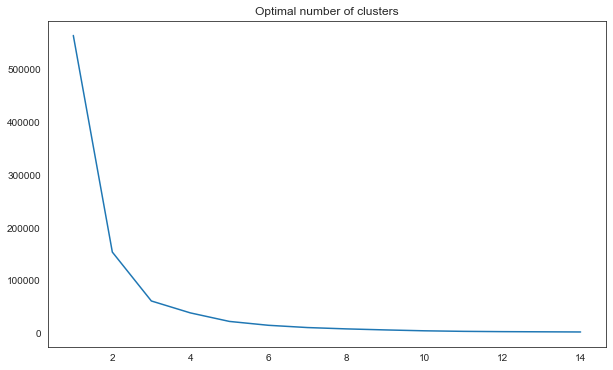

In [109]:
inertias = {}

for k in range(1,15):
    cl = KMeans(n_clusters=k).fit(X)
    inertias[k] = cl.inertia_
plt.figure(figsize=(10,6))
sns.lineplot(x=list(inertias.keys()),
             y=list(inertias.values()));
plt.title("Optimal number of clusters");

In [110]:
## model

clusters = KMeans(n_clusters=3)
clusters.fit(X)
X.assign(cluster=clusters.predict(X))

latitude  longitude  calculated_host_listings_count host_is_superhost  \
0      52.53454   13.40256                               7                 0   
1      52.53500   13.41758                               1                 0   
4      52.53303   13.41605                               1                 0   
5      52.54785   13.40556                               4                 0   
6      52.50479   13.43510                               2                 0   
...         ...        ...                             ...               ...   
24806  52.36399   13.63807                               1                 0   
24807  52.52373   13.40450                               1                 0   
24808  52.50601   13.32014                               3                 1   
24809  52.44345   13.50264                               1                 0   
24812  52.51916   13.50811                               1                 0   

       cluster  
0            1  
1            1  
4            1  
5            1  
6            1  
...        ...  
24806        1  
24807        1  
24808        1  
24809        1  
24812        1  

[12856 rows x 5 columns]

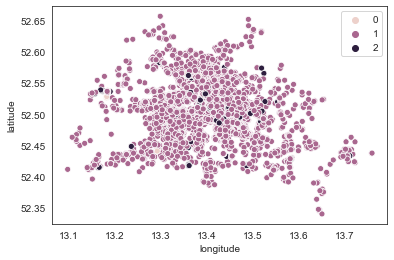

In [111]:
sns.scatterplot(data=X,
                x="longitude",
                y="latitude", 
                hue=clusters.predict(X));

In [123]:
def cluster_2d(X, n=3):
    cluster= KMeans(n_clusters=n, n_init=1)
    cluster.fit(X)
    
 
    sns.scatterplot(data=X,
                x='longitude',
                y='latitude', 
                hue=cluster.predict(X),
                palette="colorblind");
    print(f"Inertia: {cluster.inertia_}")

Inertia: 39486.47790410459


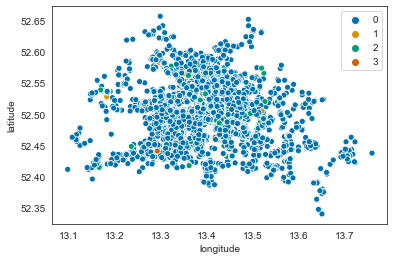

In [124]:
cluster_2d(X,4)

In [125]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color=clusters.predict(X),
                        hover_name="host_name",
                        hover_data=["host_id","calculated_host_listings_count","number_of_reviews", 'price'],
                        color_continuous_scale=["royalblue","orange","crimson",'black'],
                        zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [122]:
import plotly.graph_objs as go
scatter = go.Mesh3d(y=df["longitude"],
                       x=df["latitude"], 
                       z=df["price"])#,
                       
                      # color=clusters.predict(X));
layout = go.Layout(title="Cluster of hosts",)
#                   scene=dict(xaxis=dict(title="lat"),
 #                             yaxis=dict(title="lon"),
  #                            zaxis=dict(title="price")));
fig = go.Figure(data=scatter, layout=layout);
plotly.offline.iplot(fig)